In [1]:
import statsbomb as sb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm

In [2]:
# read 18/19 season data with xg
shots_1819 = pd.read_csv('../data/output/shots_1819.csv')

In [3]:
shots_1819.head()

,season,match_date,period,timestamp,team,player,play_pattern,under_pressure,body_part,type,...,one_on_one,open_goal,key_pass_id,start_location_x,start_location_y,distance,angle,goal,statsbomb_xg,xg
0,2018/2019,2019-03-17,1,00:17:13.830,Barcelona,Lionel Andrés Messi Cuccittini,From Free Kick,0,Foot,Free Kick,...,0,0,NaN,95.6,44.4,24.793548,18.057463,1,0.127337,0.126029
1,2018/2019,2019-03-17,1,00:24:28.346,Barcelona,Lionel Andrés Messi Cuccittini,From Free Kick,0,Foot,Free Kick,...,0,0,NaN,94.0,46.1,26.705992,16.611522,0,0.090603,0.099691
2,2018/2019,2019-03-17,1,00:39:16.313,Barcelona,Luis Alberto Suárez Díaz,Regular Play,0,Foot,Open Play,...,0,0,af55f0c3-fff3-4c57-ba83-b6f21ee01ca1,106.0,46.0,15.231546,27.407575,0,0.281204,0.224229
3,2018/2019,2019-03-17,1,00:40:37.545,Barcelona,Luis Alberto Suárez Díaz,Regular Play,0,Foot,Open Play,...,0,0,3b5ecc0f-3ce2-4c09-a283-3ef71e6e863f,110.8,51.6,14.805404,19.910626,0,0.086195,0.133293
4,2018/2019,2019-03-17,1,00:44:11.705,Barcelona,Gerard Piqué Bernabéu,From Corner,1,Head,Open Play,...,0,0,a877f6f1-b767-4d9c-888d-dbc48dd23038,111.7,40.2,8.302409,51.440300,0,0.065940,0.109323


In [4]:
# show the lowest xG goals
shots_1819[shots_1819.goal==1].sort_values('xg', ascending=True).head()
# 1.https://youtu.be/sJLiwa5f00Q?t=68
# 2.https://youtu.be/N7-JRGvS_kM?t=85
# 3.https://youtu.be/sMutPZupQdk?t=75

,season,match_date,period,timestamp,team,player,play_pattern,under_pressure,body_part,type,...,one_on_one,open_goal,key_pass_id,start_location_x,start_location_y,distance,angle,goal,statsbomb_xg,xg
189,2018/2019,2018-09-02,2,00:06:12.409,Barcelona,Ivan Rakitić,From Corner,0,Foot,Open Play,...,0,0,dcfb3115-fb49-4fa1-8873-f63553e6ef45,109.7,57.5,20.306157,11.744618,1,0.046866,0.028402
453,2018/2019,2018-10-20,2,00:42:43.029,Barcelona,Ivan Rakitić,From Free Kick,0,Foot,Open Play,...,0,0,NaN,104.1,58.1,24.091907,12.700238,1,0.022533,0.034158
341,2018/2019,2019-04-02,2,00:47:57.554,Barcelona,Luis Alberto Suárez Díaz,From Corner,0,Foot,Open Play,...,0,0,NaN,102.9,52.0,20.890428,18.024714,1,0.061100,0.035879
519,2018/2019,2019-04-06,2,00:39:15.984,Barcelona,Luis Alberto Suárez Díaz,From Throw In,0,Foot,Open Play,...,0,0,64afc220-123c-45c5-9cb2-cf68de17e30c,97.7,28.8,24.954559,16.385194,1,0.033298,0.035879
83,2018/2019,2018-12-08,2,00:19:27.748,Barcelona,Lionel Andrés Messi Cuccittini,From Free Kick,0,Foot,Free Kick,...,0,0,NaN,92.8,28.1,29.689224,14.113325,1,0.037150,0.059202


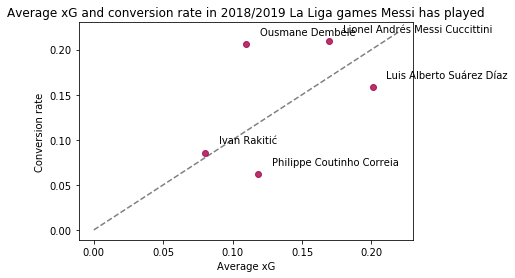

,player,conversion rate,average xG,difference
1,Ousmane Dembélé,0.205882,0.109781,0.096102
2,Lionel Andrés Messi Cuccittini,0.209302,0.169405,0.039898
3,Ivan Rakitić,0.085714,0.080127,0.005588
4,Luis Alberto Suárez Díaz,0.158416,0.200841,-0.042425
5,Philippe Coutinho Correia,0.061538,0.118074,-0.056535


In [5]:
# comparison between average xG and conversion rate

# list of barca's players
players = shots_1819['player'][shots_1819['team']=='Barcelona'].unique()

# initialize lists
conv_rates = []
avgs_xg = []
diffs = []
scorers = []

for player in players:
    # add values to lists only if the number of shot is greater than or equal to 30 
    if len(shots_1819[shots_1819['player']==player]) >= 30:
        # average xG
        avg_xg = np.mean(shots_1819['xg'][shots_1819['player']==player])
        # conversion rate
        conv_rate = np.mean(shots_1819['goal'][shots_1819['player']==player])
        # difference between conversion rate and average xG
        diff = conv_rate - avg_xg

        # add values to lists
        avgs_xg.append(avg_xg)
        conv_rates.append(conv_rate)
        diffs.append(diff)
        scorers.append(player)

# plot scatter plots
fig, ax = plt.subplots()

ax.plot([0, max(conv_rates)+0.01], [0, max(conv_rates)+0.01], c='gray', linestyle='dashed')
for (avg_xg, conv_rate, scorer) in zip(avgs_xg, conv_rates, scorers):
    ax.plot(avg_xg, conv_rate, c='#a40047', marker='o', alpha=0.8)
    ax.annotate(scorer, xy=(avg_xg+.01, conv_rate+.01))

ax.set_title('Average xG and conversion rate in 2018/2019 La Liga games Messi has played')
ax.set_xlabel('Average xG')
ax.set_ylabel('Conversion rate')
plt.show()

# show the result table 
table = pd.DataFrame({'player': scorers,
                      'conversion rate': conv_rates,
                      'average xG': avgs_xg,
                      'difference': diffs}
                     ).sort_values(by=['difference'], ascending=False)
table.index=range(1, len(table)+1)
table.head()

34it [00:40,  1.20s/it]


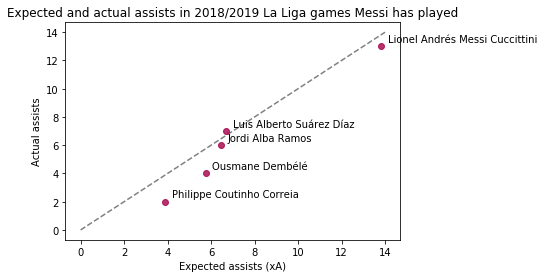

,player,assist,xA,difference
1,Lionel Andrés Messi Cuccittini,13,13.820148,-0.820148
2,Luis Alberto Suárez Díaz,7,6.692993,0.307007
3,Jordi Alba Ramos,6,6.447857,-0.447857
4,Ousmane Dembélé,4,5.759320,-1.759320
5,Philippe Coutinho Correia,2,3.882709,-1.882709


In [6]:
# comparison between xA and actual assists

# read the DataFrame of competiton
comps = sb.Competitions().get_dataframe()

# extract La Liga matches
competition_id = 11
season_ids = comps['season_id'][comps['competition_id']==competition_id].tolist()
season_names = comps['season_name'][comps['competition_id']==competition_id].tolist()
for i, season_id in enumerate(season_ids):
    matches_ = sb.Matches(event_id=competition_id, season_id=season_id).get_dataframe()
    # convert season id to season name 
    matches_['season'] = season_names[i]
    matches = matches_ if i == 0 else pd.concat([matches_, matches])
matches = matches.reset_index(drop=True)

# extract key pass data in 18/19 season 
for i, event_id in tqdm(enumerate(matches['match_id'][matches['season']=='2018/2019'])):
    events = sb.Events(event_id=str(event_id))
    passes_ = events.get_dataframe(event_type='pass')
    passes_ = passes_[passes_['id'].isin(shots_1819['key_pass_id'])]
    passes = passes_ if i == 0 else pd.concat([passes, passes_])
passes = passes.reset_index(drop=True)

# initialize lists
xas = []
assists = []
diffs = []
passers = []

for player in players:
    # key pass data on a specified player
    key_passes = passes[passes['player']==player]
    # add values to lists only if the number of key pass is greater than or equal to 30 
    if len(key_passes) >= 30:
        # sum of xG created from the key pass (xA)
        xa = np.sum(shots_1819['xg'][shots_1819['key_pass_id'].isin(key_passes['id'])])
        # actual assists
        assist = len(key_passes[key_passes['goal_assist']==1])
        # difference between xA and actual assist
        diff = assist - xa

        # add values to lists
        xas.append(xa)
        assists.append(assist)
        diffs.append(diff)
        passers.append(player)

# plot scatter plot
fig, ax = plt.subplots()

ax.plot([0, max(assists)+1], [0, max(assists)+1], c='gray', linestyle='dashed')
for (xa, assist, passer) in zip(xas, assists, passers):
    ax.plot(xa, assist, c='#a40047', marker='o', alpha=0.8)
    ax.annotate(passer, xy=(xa+.3, assist+.3))

ax.set_title('Expected and actual assists in 2018/2019 La Liga games Messi has played')
ax.set_xlabel('Expected assists (xA)')
ax.set_ylabel('Actual assists')
plt.show()
print()

# show the result table
table = pd.DataFrame({'player': passers,
                      'assist': assists,
                      'xA': xas,
                      'difference': diffs},
                      ).sort_values(by=['xA'], ascending=False)
table.index = range(1, len(table)+1)
table.head()